<a href="https://colab.research.google.com/github/MustafaShama98/Cloud-Compute/blob/main/Targil_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks"

 creds.json	  students.json   Targil-1.ipynb   targil-4.ipynb    Untitled0.ipynb
 questions.json   students.txt	  targil-2.ipynb  'Targil 5.ipynb'   Untitled1.ipynb


In [ ]:
# Install the Firebase library
!pip install firebase-admin
# Install required libraries
!pip install python-firebase
!pip install pandas
!pip install matplotlib

  Preparing metadata (setup.py) ... done
  Created wheel for python-firebase: filename=python_firebase-1.2-py3-none-any.whl size=11514 sha256=c496eb83f992f82869f52eca7e54c2b8967b809f7b3bf6c318f3fbea5fa9144e
  Stored in directory: /root/.cache/pip/wheels/db/18/48/d842a2d76125ee48cc5e3f3afa3481412099fe5aa7e5c6c8f3
Successfully built python-firebase


In [37]:
import firebase_admin
from firebase_admin import credentials, db
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load Firebase credentials from JSON file
cred_path = '/content/drive/My Drive/Colab Notebooks/creds.json'


# apps = firebase_admin.get_app(name='[DEFAULT]')
# # Check if there are any initialized apps
# if apps:
#     # Delete the first initialized app (assuming you have only one)
#     firebase_admin.delete_app(apps)
#     print("Firebase app deleted successfully")
# else:
#     print("No Firebase apps to delete")

if not firebase_admin._apps:
    cred = credentials.Certificate(cred_path)
    firebase_admin.initialize_app(cred,{'databaseURL':'https://cloudcomputing-2bbc8-default-rtdb.europe-west1.firebasedatabase.app/'})


# Create an index and save it in Firestore
index_data = {
    'Virtualization': {
        'Link': 'https://www.vmware.com/il/solutions/virtualization.html',
        'Occurrences': 30
    },
    'vSphere': {
        'Link': 'https://www.vmware.com/il/products/vsphere.html',
        'Occurrences': 16
    },
    'ESXi': {
        'Link': 'https://www.vmware.com/il/products/esxi-and-esx.html',
        'Occurrences': 11
    },
    'Horizon': {
        'Link': 'https://customerconnect.vmware.com/en/downloads/info/slug/desktop_end_user_computing/vmware_horizon_clients/horizon_8',
        'Occurrences': 8
    },
    'vCenter': {
        'Link': 'https://www.vmware.com/il/products/vcenter.html',
        'Occurrences': 32
    },
    'NSX': {
        'Link': 'https://www.vmware.com/il/products/nsx.html',
        'Occurrences': 24
    },
    'Cloud Computing': {
        'Link': 'https://www.vmware.com/content/vmware/vmware-published-sites/us/solutions/cloud-computing.html',
        'Occurrences': 4
    },
    'Workstation': {
        'Link': 'https://www.vmware.com/il/products/workstation-pro.html',
        'Occurrences': 21
    },
    'Hybrid Cloud': {
        'Link': 'https://www.vmware.com/il/cloud-solutions/hybrid-cloud.html',
        'Occurrences': 28
    },
    'Security': {
        'Link': 'https://www.vmware.com/il/security.html',
        'Occurrences': 33
    }
}
# # Reference to the database
ref = db.reference('/vmware_index')

# Set the index data
ref.set(index_data)

print("Index saved to Firestore successfully.")


Index saved to Firestore successfully.



Updated DataFrame with Occurrences:
              Word  \
0  Cloud Computing   
1             ESXi   
2          Horizon   
3     Hybrid Cloud   
4              NSX   
5         Security   
6   Virtualization   
7      Workstation   
8          vCenter   
9          vSphere   

                                                                                                                                                  Data  \
0                         {'Link': 'https://www.vmware.com/content/vmware/vmware-published-sites/us/solutions/cloud-computing.html', 'Occurrences': 4}   
1                                                                  {'Link': 'https://www.vmware.com/il/products/esxi-and-esx.html', 'Occurrences': 11}   
2  {'Link': 'https://customerconnect.vmware.com/en/downloads/info/slug/desktop_end_user_computing/vmware_horizon_clients/horizon_8', 'Occurrences': 8}   
3                                                           {'Link': 'https://www.vmware.com/il/cloud-so

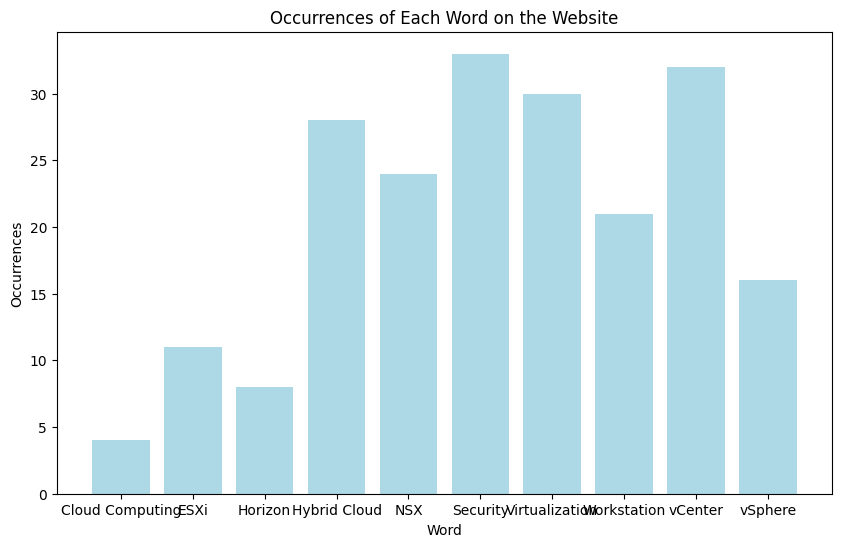

In [41]:
import firebase_admin
from firebase_admin import db, credentials
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Check if the app is already initialized
if not firebase_admin._apps:
    # Load Firebase credentials from JSON file
    cred_path = '/content/drive/My Drive/Colab Notebooks/creds.json'
    cred = credentials.Certificate(cred_path)
    firebase_admin.initialize_app(cred)

# Reference to the database
ref = db.reference('/vmware_index')

# Retrieve the index data from Firebase
index_data = ref.get()


# Count occurrences for each word in index_data
occurrences_dict = {}
for word, data in index_data.items():
    link = data['Link']
    occurrences = data['Occurrences']
    occurrences_dict[word] = occurrences

# Create a DataFrame from the index data
df = pd.DataFrame(list(index_data.items()), columns=['Word', 'Data'])



# Update the DataFrame with the occurrences
df['Occurrences'] = df['Word'].map(occurrences_dict)

# Display the updated DataFrame with full link URLs and Occurrences
print("\nUpdated DataFrame with Occurrences:")
print(df)

# Plot a chart representing the occurrences of each word
plt.figure(figsize=(10, 6))
plt.bar(df['Word'], df['Occurrences'], color='lightblue')
plt.title('Occurrences of Each Word on the Website')
plt.xlabel('Word')
plt.ylabel('Occurrences')
plt.show()
